In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from statsmodels.api import OLS

In [47]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [50]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

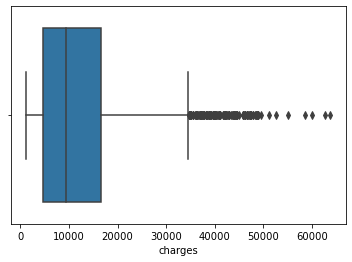

In [51]:
sns.boxplot(x='charges',data=data)
plt.show()

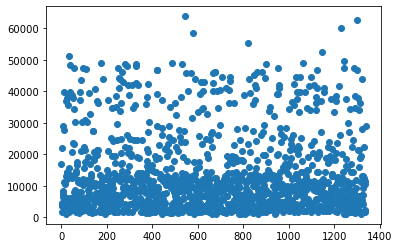

In [52]:
plt.scatter(data['charges'].index,data['charges'].values)
plt.show()

In [53]:
data = data[data['charges']<50000]

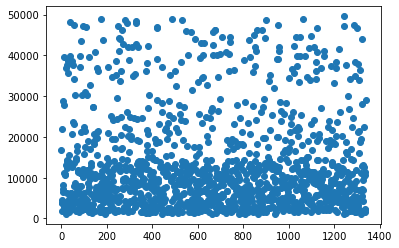

In [54]:
plt.scatter(data['charges'].index,data['charges'].values)
plt.show()

In [56]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
data2 = pd.get_dummies(data)
data2

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [58]:
target = data2['charges']
featuers = data2.drop('charges', axis =1 )

In [59]:
scaller = StandardScaler()
sfeatures = scaller.fit_transform(featuers)
sfeatures

array([[-1.43641573, -0.44902969, -0.90987086, ..., -0.56607112,
        -0.61121274,  1.76656249],
       [-1.50757624,  0.51540073, -0.0803927 , ..., -0.56607112,
         1.63609156, -0.56607112],
       [-0.79597117,  0.38889112,  1.57856362, ..., -0.56607112,
         1.63609156, -0.56607112],
       ...,
       [-1.50757624,  1.02143918, -0.90987086, ..., -0.56607112,
         1.63609156, -0.56607112],
       [-1.29409472, -0.7940559 , -0.90987086, ..., -0.56607112,
        -0.61121274,  1.76656249],
       [ 1.55232556, -0.2568008 , -0.90987086, ...,  1.76656249,
        -0.61121274, -0.56607112]])

In [66]:
starget = scaller.fit_transform(target.values.reshape(-1,1))
starget

array([[ 0.32904318],
       [-0.96718749],
       [-0.73427445],
       ...,
       [-0.9753721 ],
       [-0.94304097],
       [ 1.37705288]])

In [68]:
X_train, X_test , y_train , y_test = train_test_split(sfeatures,starget,test_size=0.2,random_state=12345)

In [69]:
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train,y_train)
predictions = simple_linear_model.predict(X_test)
SCORE = r2_score(y_test,predictions)
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
t1 = pd.DataFrame({'SCORE':SCORE,"MSE":MSE, "MAE":MAE, "RMSE":RMSE},index=['Simple_linear_model'])
t1

,SCORE,MSE,MAE,RMSE
Simple_linear_model,0.77538,0.231636,0.335742,0.481286


In [71]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
predictiont = tree_model.predict(X_test)
SCORE = r2_score(y_test,predictiont)
MAE = mean_absolute_error(y_test,predictiont)
MSE = mean_squared_error(y_test,predictiont)
RMSE = np.sqrt(MSE)
t2 = pd.DataFrame({'SCORE':SCORE,"MSE":MSE, "MAE":MAE, "RMSE":RMSE},index=['Decision_Tree'])
t2

,SCORE,MSE,MAE,RMSE
Decision_Tree,0.71288,0.296089,0.257425,0.544141


In [84]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train.ravel())
predictionf = forest_model.predict(X_test)
SCORE = r2_score(y_test,predictionf)
MAE = mean_absolute_error(y_test,predictionf)
MSE = mean_squared_error(y_test,predictionf)
RMSE = np.sqrt(MSE)
t3 = pd.DataFrame({'SCORE':SCORE,"MSE":MSE, "MAE":MAE, "RMSE":RMSE},index=['RandoM_Forest'])
t3

,SCORE,MSE,MAE,RMSE
RandoM_Forest,0.841815,0.163126,0.220457,0.403889


In [88]:
xgbb = XGBRegressor()
xgbb.fit(X_train,y_train)
predictionx = xgbb.predict(X_test)
SCORE = r2_score(y_test,predictionx)
MAE = mean_absolute_error(y_test,predictionx)
MSE = mean_squared_error(y_test,predictionx)
RMSE = np.sqrt(MSE)
t4 = pd.DataFrame({'SCORE':SCORE,"MSE":MSE, "MAE":MAE, "RMSE":RMSE},index=['XGB'])
t4

,SCORE,MSE,MAE,RMSE
XGB,0.822841,0.182693,0.23148,0.427427


In [89]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=2000,num=20)]
max_depth = [int(x) for x in np.linspace(start=1, stop=10,num=10)]
max_depth.append(None)
max_features = ['sqrt','auto']
min_samples_leaf = [1,2,5]
min_samples_split = [2,5,10]
bootstrap = [False, True]

random_params = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'bootstrap':bootstrap,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split,
    'max_features':max_features
}

In [91]:
forestmodel = RandomForestRegressor()
RandomizedSearchCV_forest = RandomizedSearchCV(estimator=forestmodel,param_distributions=random_params,cv=3,n_iter=100,n_jobs=-1,verbose=2)
RandomizedSearchCV_forest.fit(X_train,y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
           

In [92]:
RandomizedSearchCV_forest.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [94]:
predictionRF = RandomizedSearchCV_forest.best_estimator_.predict(X_test)
SCORE = r2_score(y_test,predictionRF)
MAE = mean_absolute_error(y_test,predictionRF)
MSE = mean_squared_error(y_test,predictionRF)
RMSE = np.sqrt(MSE)
t5 = pd.DataFrame({'SCORE':SCORE,"MSE":MSE, "MAE":MAE, "RMSE":RMSE},index=['RandoM_Forest_RandomizedSearchCV'])
t5

,SCORE,MSE,MAE,RMSE
RandoM_Forest_RandomizedSearchCV,0.860354,0.144009,0.205756,0.379485


In [95]:
max_depthX = [int(x) for x in np.linspace(start=2,stop=20,num=10)]
learning_rate = [float(x) for x in np.linspace(start=0.01,stop=0.3,num=10)]
n_estimatorsX = [int(x) for x in np.linspace(start=100,stop=1000,num=20)]
params = { 'max_depth': max_depthX,
           'learning_rate': learning_rate,
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': n_estimatorsX
}


In [97]:
xgbT = XGBRegressor()
XGB_RandomizedSearchCV = RandomizedSearchCV(estimator=xgbT,param_distributions=params,verbose=2,n_iter=100,cv=3,n_jobs=-1)
XGB_RandomizedSearchCV.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                          0.042222222222222223,
                           

In [98]:
predictionRX = XGB_RandomizedSearchCV.best_estimator_.predict(X_test)
SCORE = r2_score(y_test,predictionRX)
MAE = mean_absolute_error(y_test,predictionRX)
MSE = mean_squared_error(y_test,predictionRX)
RMSE = np.sqrt(MSE)
t6 = pd.DataFrame({'SCORE':SCORE,"MSE":MSE, "MAE":MAE, "RMSE":RMSE},index=['XGB_RandomizedSearchCV'])
t6

,SCORE,MSE,MAE,RMSE
XGB_RandomizedSearchCV,0.869121,0.134967,0.220146,0.367379


In [106]:
max_depth=[int(x) for x in np.linspace(start=1,stop=10,num=10)]
min_samples_split=[2,4,6,10]
min_samples_leaf=[1,2,5,10]
max_features=['auto','sqrt']
max_leaf_nodes=[int(x) for x in np.linspace(start=2,stop=10,num=5)]

params = {
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'max_leaf_nodes':max_leaf_nodes
}


In [107]:
TREE = DecisionTreeRegressor()
RandomizedSearchCV_TREE = RandomizedSearchCV(estimator=TREE,param_distributions=params,n_iter=100,n_jobs=-1,cv=3,verbose=2)
RandomizedSearchCV_TREE.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 4, 6, 10]},
                   verbose=2)

In [109]:
predictionTREE = RandomizedSearchCV_TREE.best_estimator_.predict(X_test)
SCORE = r2_score(y_test,predictionTREE)
MAE = mean_absolute_error(y_test,predictionTREE)
MSE = mean_squared_error(y_test,predictionTREE)
RMSE = np.sqrt(MSE)
t7 = pd.DataFrame({'SCORE':SCORE,"MSE":MSE, "MAE":MAE, "RMSE":RMSE},index=['DecisionTree_RandomizedSearchCV'])
t7

,SCORE,MSE,MAE,RMSE
DecisionTree_RandomizedSearchCV,0.848128,0.156616,0.229684,0.395747


In [110]:
result = pd.concat([t1,t2,t3,t4,t5,t6,t7],axis = 0)
result.sort_values(by="SCORE",ascending=False)

,SCORE,MSE,MAE,RMSE
XGB_RandomizedSearchCV,0.869121,0.134967,0.220146,0.367379
RandoM_Forest_RandomizedSearchCV,0.860354,0.144009,0.205756,0.379485
DecisionTree_RandomizedSearchCV,0.848128,0.156616,0.229684,0.395747
RandoM_Forest,0.841815,0.163126,0.220457,0.403889
XGB,0.822841,0.182693,0.231480,0.427427
Simple_linear_model,0.775380,0.231636,0.335742,0.481286
Decision_Tree,0.712880,0.296089,0.257425,0.544141
